# Importing Libraries

In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the yeo-johnson transformation
import scipy.stats as stats

# Never display warnings when match
import warnings
warnings.filterwarnings('ignore')

In [2]:
# display all columns
pd.set_option('display.max_columns', None)

# Data Loading


In [3]:
# Load the dataset
path = r"..\\Attrition Dataset\\WA_Fn-UseC_-HR-Employee-Attrition.csv"
#path = r"C:\Users\user\Desktop\project_1\AttritionForecast-Analysis-and-Prediction\Attrition Dataset\WA_Fn-UseC_-HR-Employee-Attrition.csv"

try:
    Employee_Attrition = pd.read_csv(path)
    print("File loaded successfully!")

    
except FileNotFoundError:
    print(f"The file at path {path} was not found. Please check the path and try again.")
except Exception as e:
    print(f"An error occurred: {e}")


File loaded successfully!


In [4]:
# Showing dimension of data
Employee_Attrition.shape

(1470, 35)

In [5]:
# Showing first five rows
Employee_Attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# Missing Values

In [6]:
# Checking Missing Values
Employee_Attrition.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

   #### There is no missing values in the dataset.

In [7]:
# Seeing datatype each column
Employee_Attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
# Descriptive Statistics of Datasets
Employee_Attrition.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Obserations
- we only have int and string data types features. there is no feature with float. 26 features are numerical and 9 features are categorical
- Attrition in out target value whiwh has no missing value. But, the quality of data of employees having attrition is less compared to employee whoch do not have attrition.
- We are having a complete dataset, there no any missing values in dataset. 

# Checking Duplicates

In [9]:
print(Employee_Attrition.duplicated().value_counts())
Employee_Attrition.drop_duplicates(inplace = True)
print(len(Employee_Attrition))

False    1470
Name: count, dtype: int64
1470


   #### There is no duplicated data in the dataset.

# Target Variable

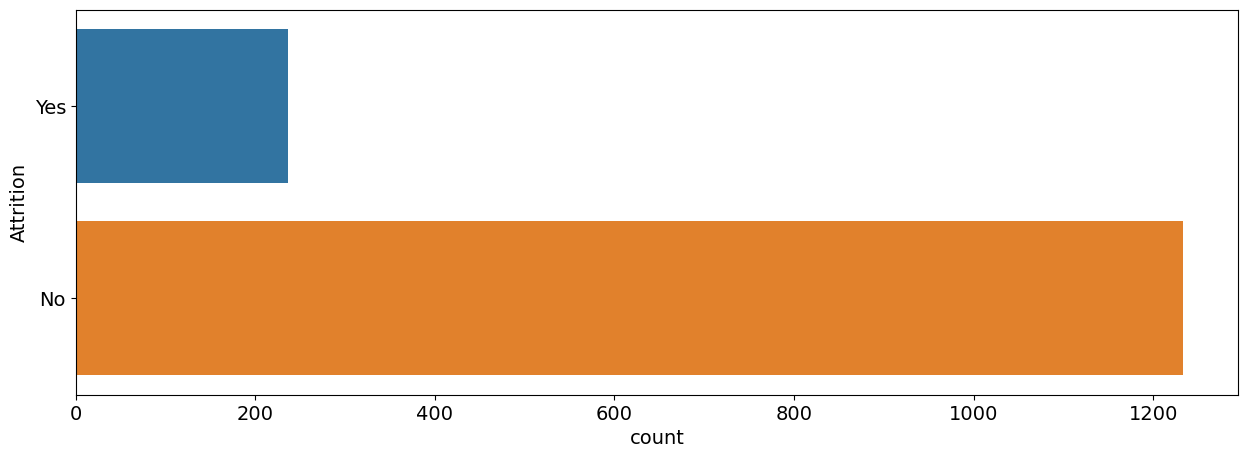

In [10]:
plt.figure(figsize=(15,5))
plt.rc('font', size=14)
sns.countplot(y ='Attrition', data=Employee_Attrition )
plt.show()

#### we are noticeing here that the Target column is highly imbalanced, we need to balance the data by using some Statistical methods.

### Dropping Useless Columns

The 'Over18' column appears to be a binary column indicating whether an employee is over 18 years old. Given that all employees in this dataset are likely over 18 (since it is an HR dataset for employees), this column might not provide any useful information for analysis or modeling. It could be redundant.

In [11]:
# checking the unique values in the Over18 column to confirm this:
Employee_Attrition['Over18'].value_counts()

Over18
Y    1470
Name: count, dtype: int64

###### The Over18 column has only one unique value ('Y'), indicating that all employees are indeed over 18 years old. Therefore, this column does not provide any additional information and can be safely dropped.

In [12]:
# Drop the Over18 column
Employee_Attrition = Employee_Attrition.drop(columns=['Over18'])
Employee_Attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,80,1,6,3,3,2,2,2,2


The 'EmployeeCount' column appears to be a constant value of 1 for all entries, which does not provide any useful information for analysis or modeling. This column is likely redundant, similar to the Over18 column.

In [13]:
# checking the unique values in the EmployeeCount column
Employee_Attrition['EmployeeCount'].value_counts()

EmployeeCount
1    1470
Name: count, dtype: int64

##### The 'EmployeeCount' column has only one unique value (1), indicating that it is indeed redundant.

In [14]:
# Dropping the EmployeeCount column
Employee_Attrition = Employee_Attrition.drop(columns=['EmployeeCount'])
Employee_Attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,80,1,6,3,3,2,2,2,2


# Exploratry Data Analysis

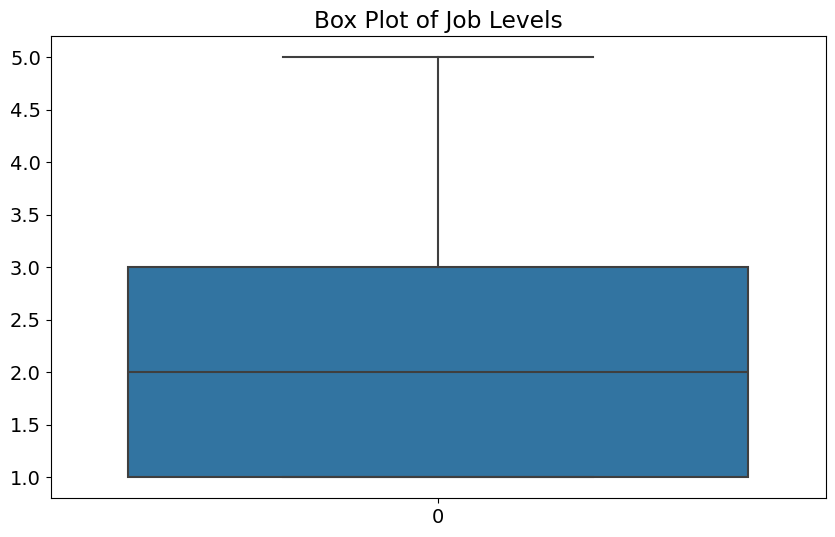

In [15]:
# Box Plot of Job Levels
plt.figure(figsize=(10, 6))
sns.boxplot(data=Employee_Attrition['JobLevel'])
plt.title("Box Plot of Job Levels")
plt.show()

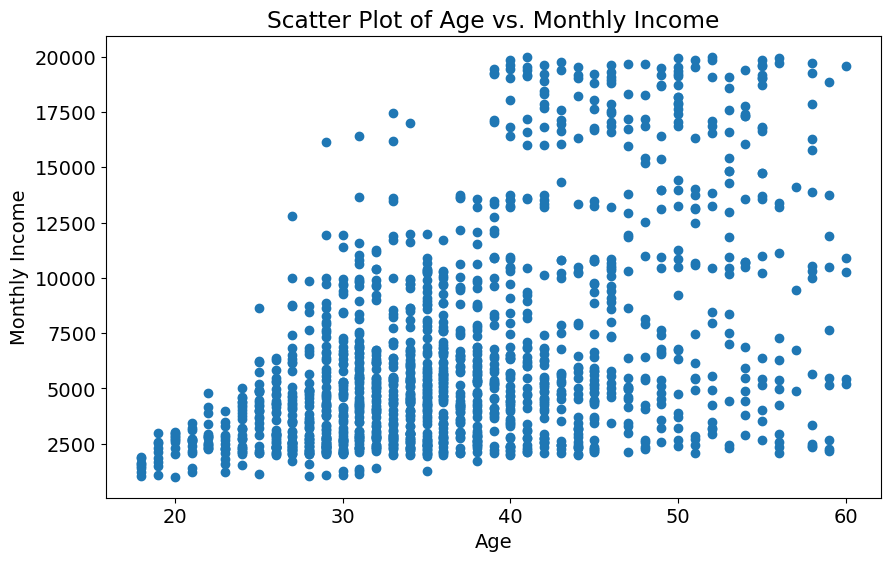

In [16]:
# Age vs. Monthly Income
plt.figure(figsize=(10, 6))
plt.scatter(Employee_Attrition['Age'], Employee_Attrition['MonthlyIncome'])
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.title('Scatter Plot of Age vs. Monthly Income')
plt.show()

**Z-Score:** Measures how many standard deviations a data point is from the mean. Points with a Z-score greater than 3 or less than -3 are often considered outliers.

In [17]:
# Standard Deviation
from scipy import stats
from collections import Counter

z_scores = stats.zscore(Employee_Attrition['MonthlyIncome'])
outliers = abs(z_scores) > 3
Employee_Attrition[outliers]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


**IQR (Interquartile Range):** The range between the first quartile (Q1) and the third quartile (Q3). Points that lie below Q1 - 1.5IQR or above Q3 + 1.5IQR are considered outliers.

In [18]:
Q1 = Employee_Attrition['MonthlyIncome'].quantile(0.25)
Q3 = Employee_Attrition['MonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = Employee_Attrition[(Employee_Attrition['MonthlyIncome'] < lower_bound) | (Employee_Attrition['MonthlyIncome'] > upper_bound)]
outliers

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
25,53,No,Travel_Rarely,1282,Research & Development,5,3,Other,32,3,Female,58,3,5,Manager,3,Divorced,19094,10735,4,No,11,3,4,80,1,26,3,2,14,13,4,8
29,46,No,Travel_Rarely,705,Sales,2,4,Marketing,38,2,Female,83,3,5,Manager,1,Single,18947,22822,3,No,12,3,4,80,0,22,2,2,2,2,2,1
45,41,Yes,Travel_Rarely,1360,Research & Development,12,3,Technical Degree,58,2,Female,49,3,5,Research Director,3,Married,19545,16280,1,No,12,3,4,80,0,23,0,3,22,15,15,8
62,50,No,Travel_Rarely,989,Research & Development,7,2,Medical,80,2,Female,43,2,5,Research Director,3,Divorced,18740,16701,5,Yes,12,3,4,80,1,29,2,2,27,3,13,8
105,59,No,Non-Travel,1420,Human Resources,2,4,Human Resources,140,3,Female,32,2,5,Manager,4,Married,18844,21922,9,No,21,4,4,80,1,30,3,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,58,No,Travel_Rarely,605,Sales,21,3,Life Sciences,1938,4,Female,72,3,4,Manager,4,Married,17875,11761,4,Yes,13,3,3,80,1,29,2,2,1,0,0,0
1377,49,No,Travel_Frequently,1064,Research & Development,2,1,Life Sciences,1941,2,Male,42,3,5,Research Director,4,Married,19161,13738,3,No,15,3,4,80,0,28,3,3,5,4,4,3
1401,55,No,Travel_Rarely,189,Human Resources,26,4,Human Resources,1973,3,Male,71,4,5,Manager,2,Married,19636,25811,4,Yes,18,3,1,80,1,35,0,3,10,9,1,4
1437,39,No,Non-Travel,105,Research & Development,9,3,Life Sciences,2022,4,Male,87,3,5,Manager,4,Single,19431,15302,2,No,13,3,3,80,0,21,3,2,6,0,1,3


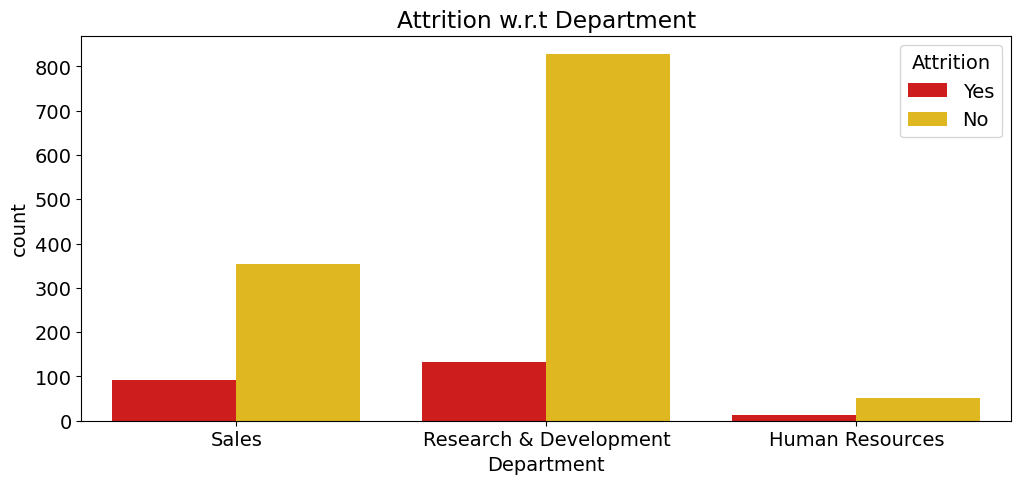

In [19]:
# Attrition wrt Departement 
plt.figure(figsize=(12,5))
sns.countplot(x='Department', hue='Attrition', data=Employee_Attrition, palette='hot')
plt.title('Attrition w.r.t Department')
plt.show()

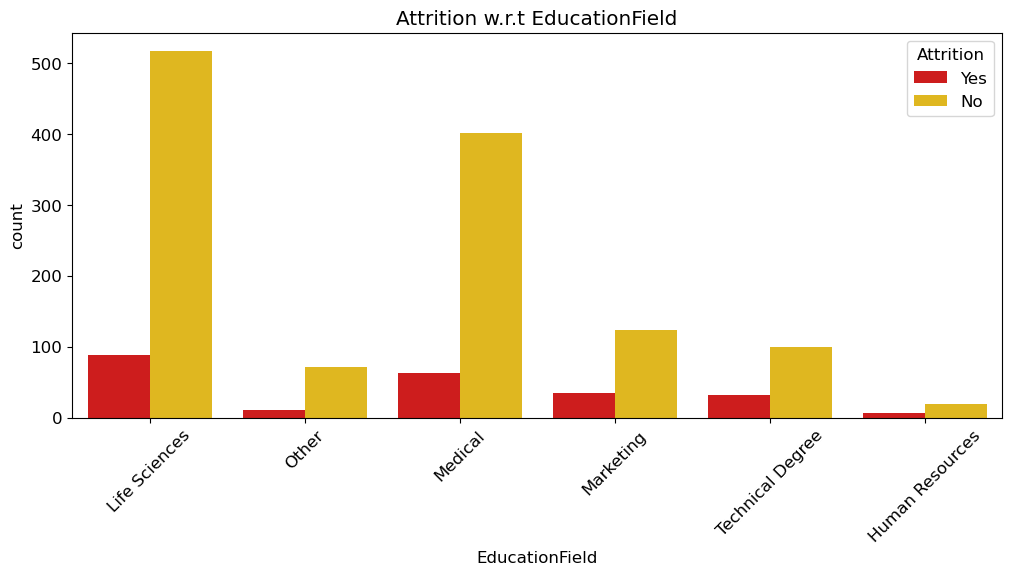

In [20]:
# Attrition wrt Departement 
plt.figure(figsize=(12,5))
plt.rc('font', size=12)
sns.countplot(x='EducationField', hue='Attrition', data=Employee_Attrition, palette='hot')
plt.title('Attrition w.r.t EducationField')
plt.xticks(rotation=45)
plt.show()

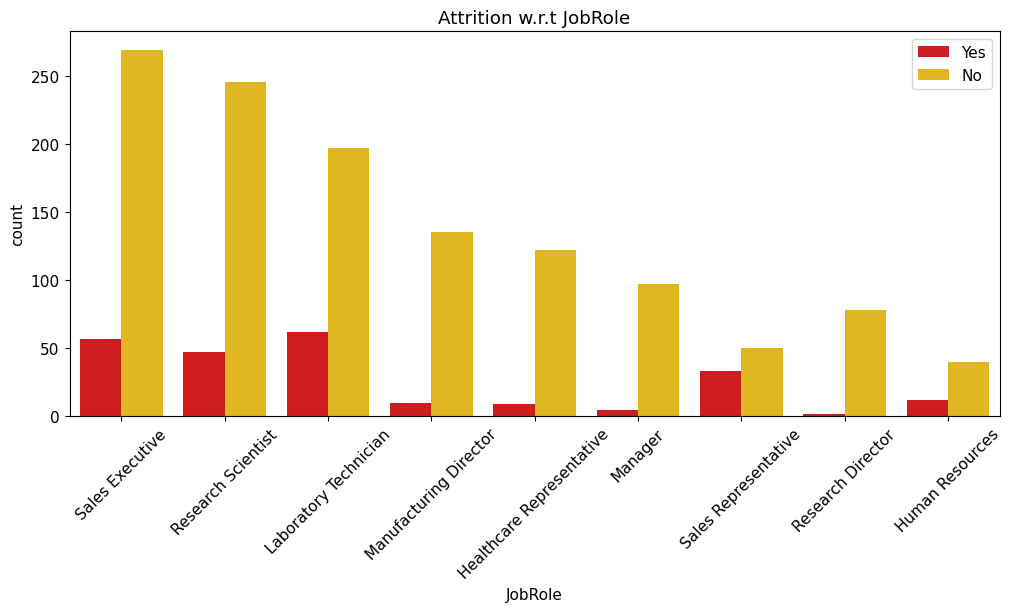

In [21]:
# Let's see at which post most people are leaving the jobs (Attrition wrt JobRole) 
plt.figure(figsize=(12,5))
plt.rc('font', size=11)
sns.countplot(x='JobRole', hue='Attrition', data=Employee_Attrition, palette='hot')
plt.title('Attrition w.r.t JobRole')
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.show()

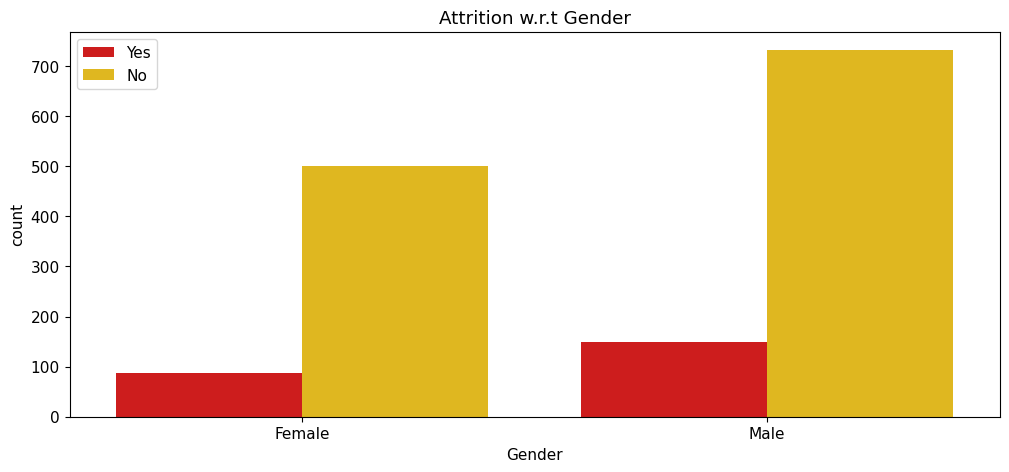

In [22]:
# Attrition wrt Gender
plt.figure(figsize=(12,5))
sns.countplot(x='Gender', hue='Attrition', data=Employee_Attrition, palette='hot')
plt.title('Attrition w.r.t Gender')
plt.legend(loc='best')
plt.show()

In [23]:
attrited_employees = Employee_Attrition[Employee_Attrition['Attrition'] == 'Yes']
filtered_employees = attrited_employees[attrited_employees['JobRole'].isin(['Sales Executive', 'Sales Representative'])]
filtered_employees[['JobRole', 'YearsAtCompany']].describe()

,YearsAtCompany
count,90.000000
mean,5.011111
std,4.879433
min,0.000000
25%,1.000000
50%,3.000000
75%,7.750000
max,23.000000


## Observations
- Employees working in R&D department are leaving their jobs more than others employees in the other departments, but employees from sales executive, sale Representative leaves the job early.
- Males are more under Attrition then Females.

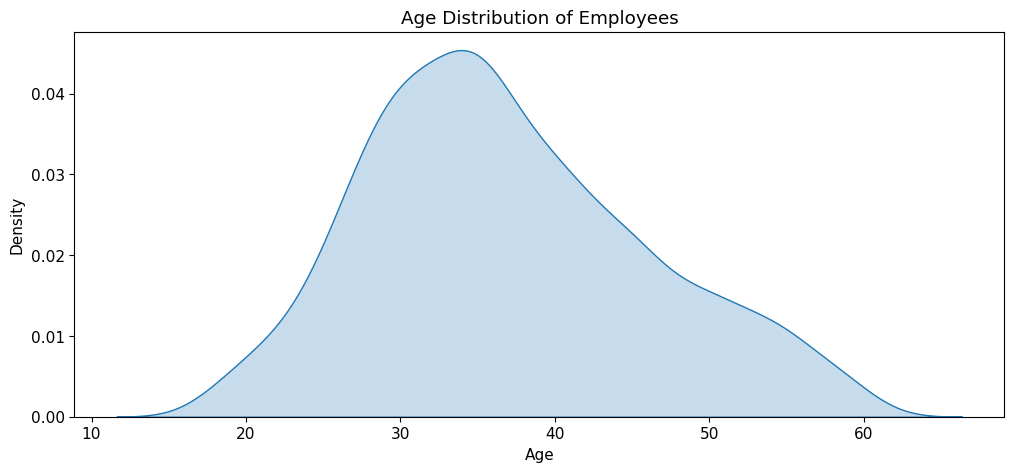

In [24]:
# Distribution of age
plt.figure(figsize=(12, 5))
sns.kdeplot(Employee_Attrition['Age'], shade=True)
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

- Age column is very well normalized, most of employees are age between 25 to 40.

###### we are having some of the numerical columns which are lebel encoded for us, they are ordinal labels, so let's get a close look at them first :

In [25]:
Employee_Attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,80,1,6,3,3,2,2,2,2


In [26]:
Employee_Attrition.select_dtypes(include='number').columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [27]:
ordinal_features = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 
 'WorkLifeBalance', ]
Employee_Attrition[ordinal_features].head()

,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,2,2,3,4,3,1,1
1,1,3,2,2,4,4,3
2,2,4,2,3,3,2,3
3,4,4,3,3,3,3,3
4,1,1,3,2,3,4,3


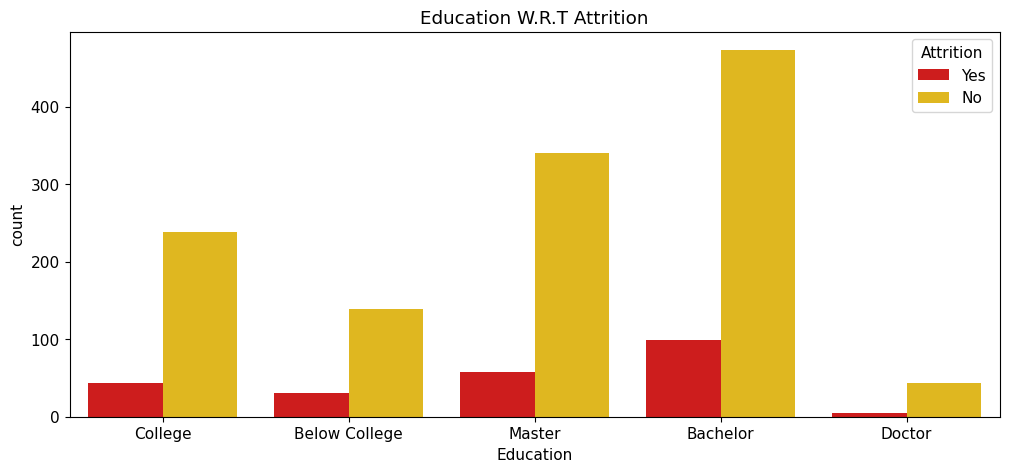

In [28]:
# Education W.R.T Attrition
edu_map = {1 :'Below College', 2: 'College', 3 :'Bachelor', 4 :'Master', 5: 'Doctor'}
plt.figure(figsize=(12,5))
sns.countplot(x=Employee_Attrition['Education'].map(edu_map), hue='Attrition', data=Employee_Attrition, palette='hot')
plt.title("Education W.R.T Attrition")
plt.show()

**Observation**
- Employees from Bachelor are more then employee from Masters background. Attrition of employees from bachelor background can be seem more because they have more and more expectation from companies and it will be interesting to see the reason behind this in this dataset.

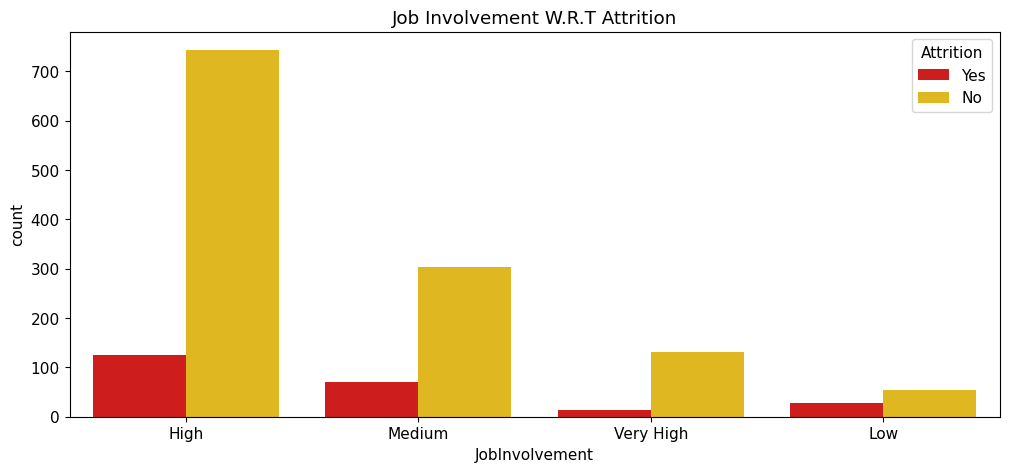

In [29]:
# Job Involvement W.R.T Attrition
edu_map = {1 :'Low', 2: 'Medium', 3 :'High', 4 :'Very High'}
plt.figure(figsize=(12,5))
sns.countplot(x=Employee_Attrition['JobInvolvement'].map(edu_map), hue='Attrition', data=Employee_Attrition, palette='hot')
plt.title("Job Involvement W.R.T Attrition")
plt.show()

**Observations:**

- Employees with high job involvement (categorized as "High" or "Very High") tend to have lower attrition rates.
- Employees with low or medium job involvement show higher attrition rates.
- Even highly involved employees can experience attrition, indicating other factors may also influence their decision to leave.

#### Given the context and distribution of the JobLevel values, we can assign labels that reflect the seniority and responsibility associated with each level. Here are the suggested labels:

- JobLevel 1: Entry Level.
    Typically for roles that are starting positions within the company, often requiring less experience and responsibility.

- JobLevel 2: Intermediate Level.
    For roles that require some experience and a moderate level of responsibility. These positions might involve some level of specialization or supervisory tasks.

- JobLevel 3: Mid Level.
    For roles that require significant experience, higher levels of responsibility, and possibly supervisory roles. Employees at this level are expected to have specialized knowledge and skills.
    
- JobLevel 4: Senior Level.
    For roles that involve high levels of responsibility, significant experience, and often leadership roles. These positions typically require advanced skills and knowledge.

- JobLevel 5: Executive Level.
    For top-level roles that involve strategic decision-making, extensive experience, and leadership of large teams or entire departments. These positions are often associated with executive titles and the highest pay bands.


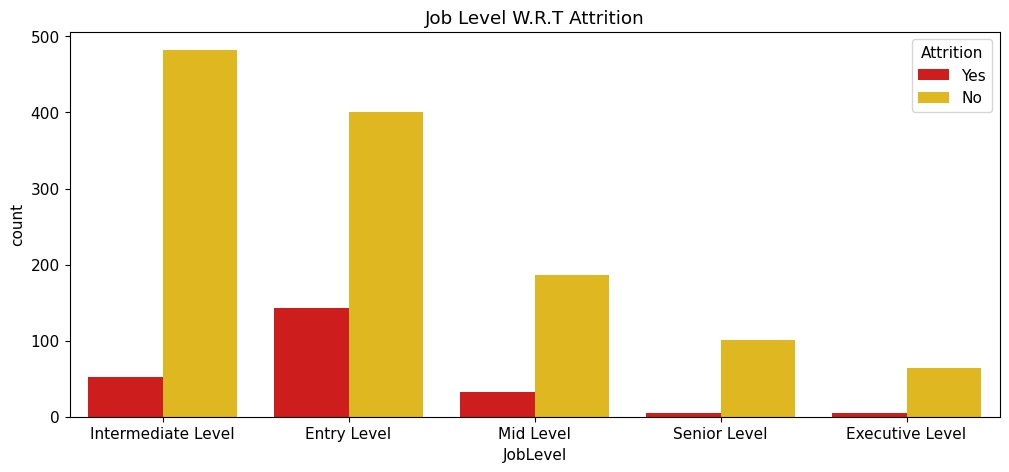

In [30]:
# Job Level W.R.T Attrition
edu_map = {1: 'Entry Level', 2: 'Intermediate Level', 3: 'Mid Level', 4: 'Senior Level', 5: 'Executive Level'}
plt.figure(figsize=(12,5))
sns.countplot(x=Employee_Attrition['JobLevel'].map(edu_map), hue='Attrition', data=Employee_Attrition, palette='hot')
plt.title("Job Level W.R.T Attrition")
plt.show()

**Observations:**

- Attrition is highest among "Entry Level" and "Intermediate Level" employees.
- Higher job levels ("Mid Level," "Senior Level," "Executive Level") have significantly lower attrition rates.

**Insights:**

- Lower job levels experience more attrition, likely due to factors like career progression and job satisfaction.
- Higher job levels exhibit more stability.

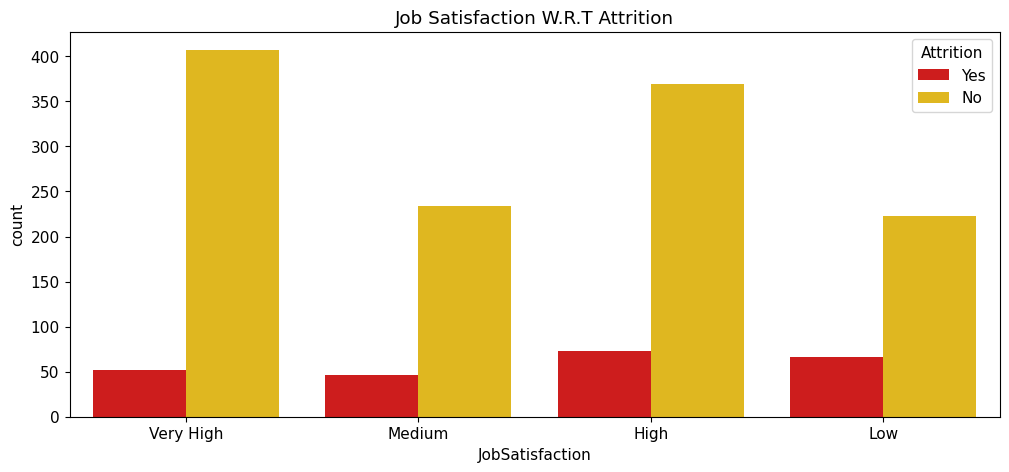

In [31]:
# Job Satisfaction W.R.T Attrition
edu_map = {1 :'Low', 2: 'Medium', 3 :'High', 4 :'Very High'}
plt.figure(figsize=(12,5))
sns.countplot(x=Employee_Attrition['JobSatisfaction'].map(edu_map), hue='Attrition', data=Employee_Attrition, palette='hot')
plt.title("Job Satisfaction W.R.T Attrition")
plt.show()

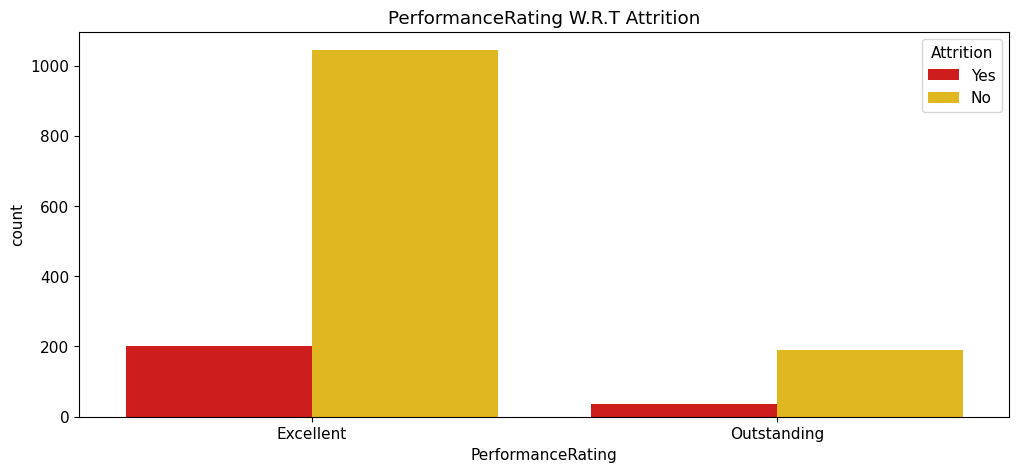

In [32]:
# PerformanceRating W.R.T Attrition
edu_map = {1 :'Low', 2: 'Good', 3 :'Excellent', 4 :'Outstanding'}
plt.figure(figsize=(12,5))
sns.countplot(x=Employee_Attrition['PerformanceRating'].map(edu_map), hue='Attrition', data=Employee_Attrition, palette='hot')
plt.title("PerformanceRating W.R.T Attrition")
plt.show()

In [33]:
# cheacking the values that performance rating takes in this dataset
edu_map = {1 :'Low', 2: 'Good', 3 :'Excellent', 4 :'Outstanding'}
Employee_Attrition['PerformanceRating'].map(edu_map).value_counts()

PerformanceRating
Excellent      1244
Outstanding     226
Name: count, dtype: int64

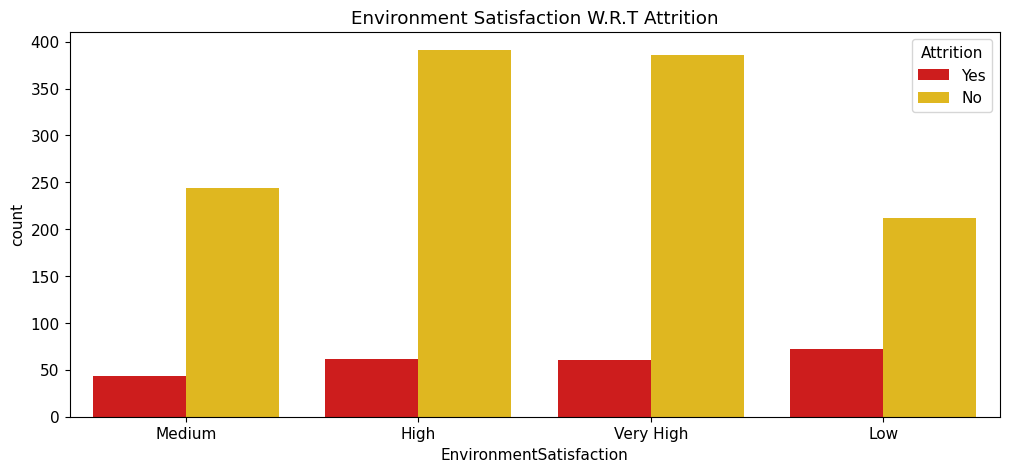

In [34]:
# Environment Satisfaction W.R.T Attrition
edu_map = {1 :'Low', 2: 'Medium', 3 :'High', 4 :'Very High'}
plt.figure(figsize=(12,5))
sns.countplot(x=Employee_Attrition['EnvironmentSatisfaction'].map(edu_map), hue='Attrition', data=Employee_Attrition, palette='hot')
plt.title("Environment Satisfaction W.R.T Attrition")
plt.show()

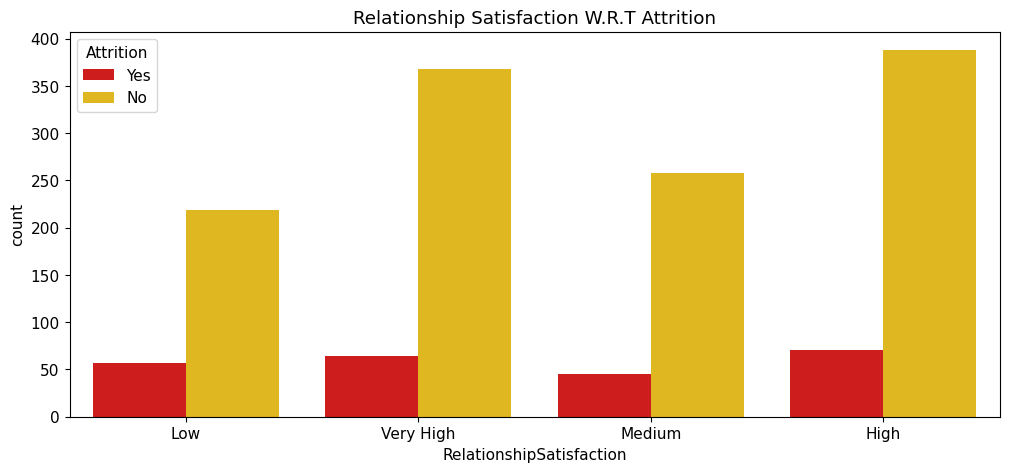

In [35]:
# Relationship Satisfaction W.R.T Attrition
edu_map = {1 :'Low', 2: 'Medium', 3 :'High', 4 :'Very High'}
plt.figure(figsize=(12,5))
sns.countplot(x=Employee_Attrition['RelationshipSatisfaction'].map(edu_map), hue='Attrition', data=Employee_Attrition, palette='hot')
plt.title("Relationship Satisfaction W.R.T Attrition")
plt.show()

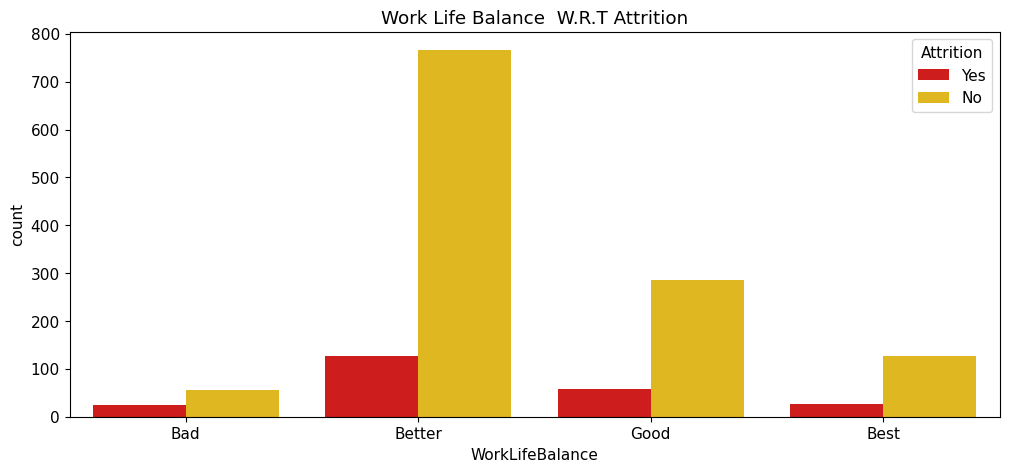

In [36]:
# Work Life Balance  W.R.T Attrition
edu_map = {1 :'Bad', 2: 'Good', 3 :'Better', 4 :'Best'}
plt.figure(figsize=(12,5))
sns.countplot(x=Employee_Attrition['WorkLifeBalance'].map(edu_map), hue='Attrition', data=Employee_Attrition, palette='hot')
plt.title("Work Life Balance  W.R.T Attrition")
plt.show()

# Label Encodeing

In [37]:
# Target Varibale (Attrition)
Employee_Attrition['Attrition'] = Employee_Attrition['Attrition'].replace({'No':0, 'Yes':1})

In [38]:
# encode binary varibales
Employee_Attrition['OverTime'] = Employee_Attrition['OverTime'].map({'No':0, 'Yes':1})
Employee_Attrition['Gender'] = Employee_Attrition['Gender'].map({'Male':0, 'Female':1})

In [39]:
# Specify the columns to be one-hot encoded
encoding_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

for column in encoding_cols:
    # Initialize OneHotEncoder
    one_hot_encoded = pd.get_dummies(Employee_Attrition[column])
    # Concatenate the encoded DataFrame with Employee_Attrition
    Employee_Attrition = pd.concat([Employee_Attrition, one_hot_encoded], axis=1)

# Drop the original categorical columns from Employee_Attrition
Employee_Attrition.drop(encoding_cols, axis=1, inplace=True)

In [40]:
Employee_Attrition.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely,Human Resources,Research & Development,Sales,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married,Single
0,41,1,1102,1,2,1,2,1,94,3,2,4,5993,19479,8,1,11,3,1,80,0,8,0,1,6,4,0,5,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
1,49,0,279,8,1,2,3,0,61,2,2,2,5130,24907,1,0,23,4,4,80,1,10,3,3,10,7,1,7,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
2,37,1,1373,2,2,4,4,0,92,2,1,3,2090,2396,6,1,15,3,2,80,0,7,3,3,0,0,0,0,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True
3,33,0,1392,3,4,5,4,1,56,3,1,3,2909,23159,1,1,11,3,3,80,0,8,3,3,8,7,3,0,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
4,27,0,591,2,1,7,1,0,40,3,1,2,3468,16632,9,0,12,3,4,80,1,6,3,3,2,2,2,2,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False


In [41]:
Employee_Attrition = Employee_Attrition.replace({True: 1, False: 0})

In [42]:
Employee_Attrition.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely,Human Resources,Research & Development,Sales,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married,Single
0,41,1,1102,1,2,1,2,1,94,3,2,4,5993,19479,8,1,11,3,1,80,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,2,3,0,61,2,2,2,5130,24907,1,0,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,4,4,0,92,2,1,3,2090,2396,6,1,15,3,2,80,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,5,4,1,56,3,1,3,2909,23159,1,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,7,1,0,40,3,1,2,3468,16632,9,0,12,3,4,80,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


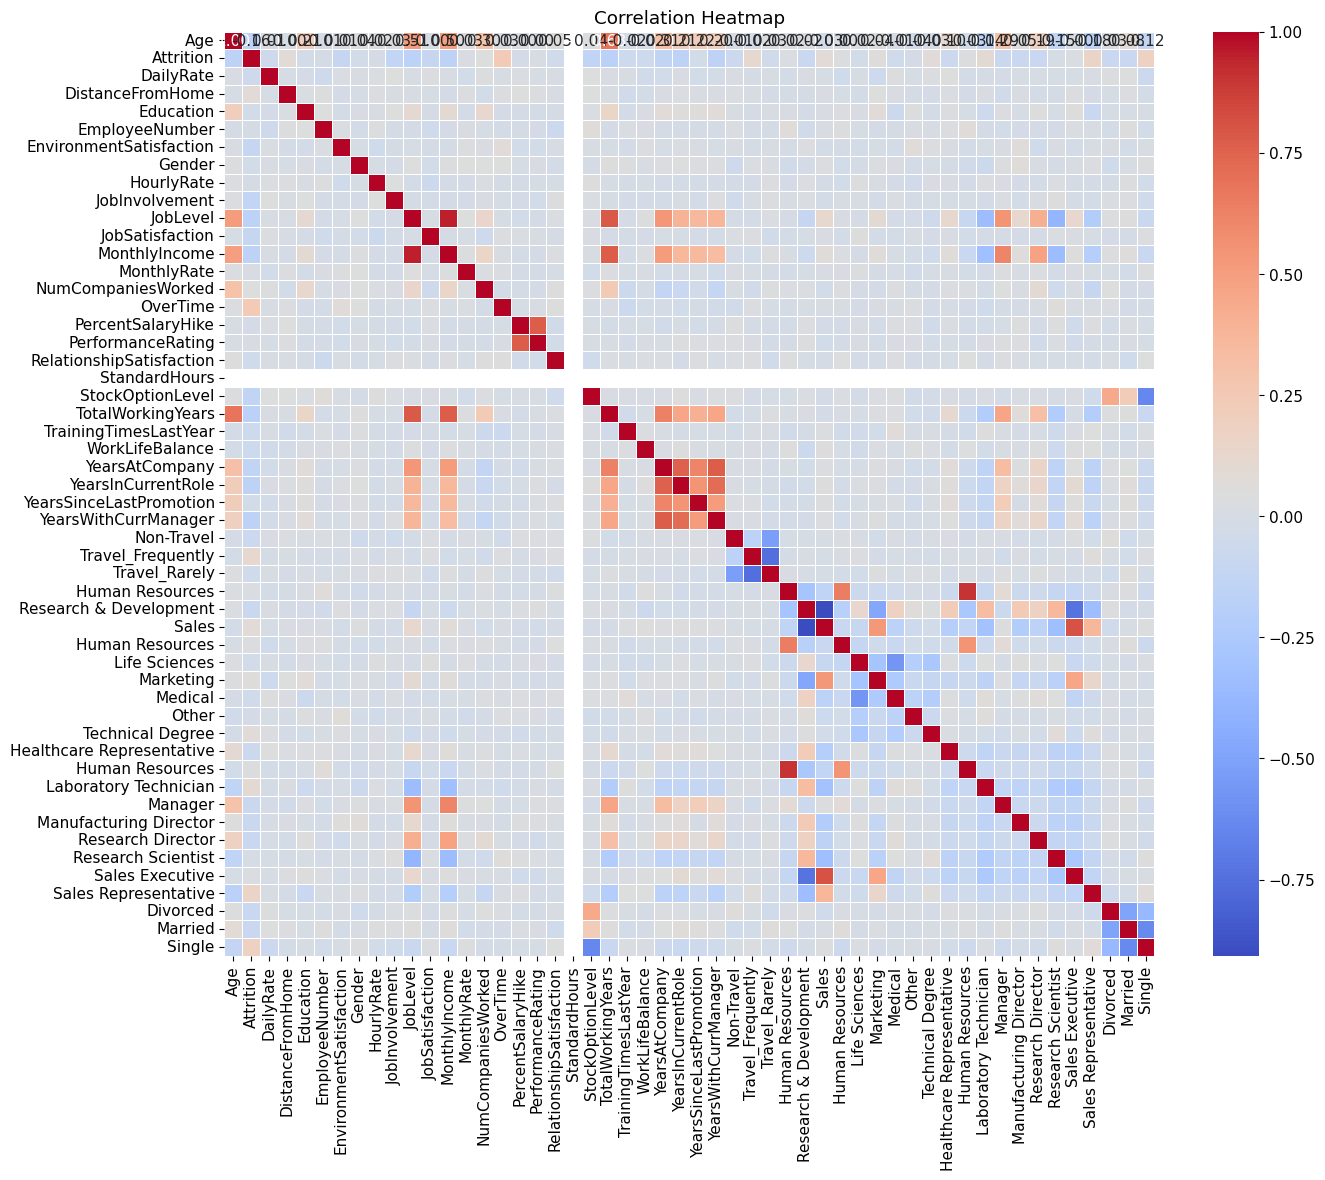

In [43]:
# Plot correlation heatmap
plt.figure(figsize=(15, 12))
correlation_matrix = Employee_Attrition.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Data Labeling

Creating a derived target variable that indicates whether an employee has stayed with the company for more than 5 years. This could be useful for predicting long-term retention:
- Create a new column LongTermEmployee which will be 1 if YearsAtCompany is greater than 5, and 0 otherwise.

In [44]:
Employee_Attrition['LongTermEmployee'] = Employee_Attrition['YearsAtCompany'].apply(lambda x: 1 if x > 5 else 0)
Employee_Attrition[['YearsAtCompany', 'LongTermEmployee']].head()

,YearsAtCompany,LongTermEmployee
0,6,1
1,10,1
2,0,0
3,8,1
4,2,0


In [45]:
Employee_Attrition['LongTermEmployee'].value_counts(normalize=True)

LongTermEmployee
0    0.527891
1    0.472109
Name: proportion, dtype: float64

In [46]:
# Checking Target Variable Distribution
Employee_Attrition['Attrition'].value_counts(normalize=True)

Attrition
0    0.838776
1    0.161224
Name: proportion, dtype: float64

##### This indicates a significant imbalance in the target variable. Given this imbalance, you may need to consider techniques to handle the imbalance during modeling, such as:

- Oversampling: Increase the number of minority class samples.
- Undersampling: Decrease the number of majority class samples.
- Synthetic Data Generation: Use techniques like SMOTE to generate synthetic samples of the minority class.

You can choose one method based on the characteristics of your dataset and the model you plan to use.
For me to handle this imbalance, i will use SMOTE (Synthetic Minority Over-sampling Technique), why:

- Generates synthetic samples for the minority class to balance the dataset.
- Effective when you have a moderate imbalance and want to create new, plausible samples rather than duplicating existing ones.


In [47]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# Separate features and target
X = Employee_Attrition.drop(columns=['Attrition'])
y = Employee_Attrition['Attrition']
print(Counter(y))
# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print(Counter(y_resampled))

Counter({0: 1233, 1: 237})
Counter({1: 1233, 0: 1233})
